# GLOBAL POWER ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Renewable energy, encompassing diverse sources such as solar, wind, hydro, and geothermal power, offers a pathway towards decarbonizing our energy systems and mitigating the adverse effects of fossil fuel consumption. Recognizing the critical importance of this transition, this project endeavors to delve into the realm of renewable energy. Our goal is to analyze global data on renewable energy technologies, shedding light on their current contributions to the energy mix and the pace of their evolution. In doing so, we seek to provide valuable insights to stakeholders, shaping the discourse on sustainable energy and enriching our collective knowledge of renewable energy infrastructure worldwide.

 ### (b) Business Understanding

In the current era marked by energy transitions and growing sustainability imperatives, the Global Renewable Energy Generation and Capacity Analysis project endeavors to decode the intricacies of the global renewable energy landscape. Through an in-depth exploration of various renewable energy sources, their capacities, and their contributions to renewable energy generation, the project aims to offer a comprehensive overview of the global renewable energy ecosystem. These insights will equip stakeholders, policymakers, and investors with valuable knowledge about the factors influencing the renewable energy industry, enabling informed decision-making in this rapidly evolving and crucial sector.

This Global Renewable Energy Analysis is set to benefit the following stakeholders;

-  Power generation companies - for Strategic planning
-  Environmental Agencies - Providing environmental impact assessment
-  Researchers and Academia - Contributing to advancements in energy studies
-  Local communities - Informed community engagement
-  Technology providers - Market identification and growth opportunities
-  Government and Regulatory Bodies - Informed decision making
-  Energy companies and investors looking for opportunities in the renewable energy market.

### (c) Problem Statement

Since the Industrial Revolution, fossil fuels have dominated the global energy mix, leading to significant greenhouse gas emissions and health issues. To combat these challenges, there's a pressing need to transition to low-carbon energy sources like nuclear and renewables. Renewable energy, in particular, is crucial for reducing CO2 emissions and air pollution. Despite the availability of existing analysis on global renewable energy, there remains a critical gap in translating this wealth of information into actionable insights for stakeholders.Therefore, there is a pressing need for a tailored approach to renewable energy analysis that addresses the specific needs and challenges faced by stakeholders at regional and local levels. 

This project aims to fill this gap by developing a framework for localized renewable energy analysis that considers the unique characteristics and dynamics of each region.

### (d) Research Questions

- How has the production of electricity from renewable sources changed over time? <br>

- Which renewable energy source shows the most significant growth?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix?<br>


### (e) The Main Objective

To construct a predictive model utilizing worldwide energy data to precisely anticipate the generation of various energies from other energy sources.

### (f) The Specific Objectives


Specific Objectives

- To assess the role each renewable energy source plays in the overall energy blend.
- To identify opportunities to enhance the portion of renewable energy in global electricity production, optimizing the shift towards sustainable sources.
- To examine how renewable energy is distributed among different power regions.
- To identify which renewable source shows the most significant growth.
- To identify disparities in renewable energy adoption between developed and developing countries and explore the underlying factors contributing to these disparities.

### (g) Data Understanding

We obtained our dataset from 'Our World in Data,' a comprehensive source of global statistics covering various aspects of energy. By merging two distinct CSV files from 'Our World in Data,' we created a dataset comprising 7165 rows and 9 columns. This dataset encompasses annual energy data for major electricity sources from 2000 to 2022.

The merged dataset contains the following columns with their descriptions:

- `Entity` (text): This column represents the geographical entity or region for which the energy data is recorded.
- `Year` (number): This column represents the year in which the energy data was recorded or measured.
- `Electricity from wind - TWhr` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of wind energy to the total electricity generation in the specified entity and year.
- `Electricity from hydro - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of hydroelectric sources to the total electricity generation in the specified entity and year.
- `Electricity from solar - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of solar energy sources to the total electricity generation in the specified entity and year.
- `Other renewables including bioenergy - TWh` (number): This column represents the combined amount of electricity generated from other renewable sources, such as biomass, geothermal, and tidal energy, excluding wind, hydro, and solar. It's also measured in terawatt-hours (TWh).
- `Electricity from Non-Renewables - TWh` (number): This column represents the amount of electricity generated from non-renewable sources, such as fossil fuels (coal, oil, natural gas) and nuclear power, in terawatt-hours (TWh).
- `Total Renewable Electricity - TWh` (number): This column represents the total amount of electricity generated from renewable sources, including wind, hydro, solar, and other renewables, in terawatt-hours (TWh).
- `Electricity generation - TWh` (number): This column represents the total electricity generated from all sources, both renewable and non-renewable, in terawatt-hours (TWh).


These columns provide a comprehensive overview of the electricity generation landscape, detailing the contributions of various renewable and non-renewable sources over time.


The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

## 2. Data Cleaning

**Importing libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd  

# Creating visualizations
import matplotlib.pyplot as plt  

# Statistical data visualization
import seaborn as sns  

# Numerical operations
import numpy as np  

import pickle

# Handling date and time information
import datetime as dt  

# Mathematical functions
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

###### Loading 1st CSV

In [2]:
# Read CSV file into data frame
df = pd.read_csv('modern-renewable-prod.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.400000
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.289999
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.540000
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.250000
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.039999


In [4]:
# Display the shape of the DataFrame
df.shape

(8961, 7)

In [5]:
# drop uneccesary column
df.drop(columns=['Code'], inplace= True)

In [6]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Year                                        8961 non-null   int64  
 2   Electricity from wind - TWh                 8000 non-null   float64
 3   Electricity from hydro - TWh                8863 non-null   float64
 4   Electricity from solar - TWh                7956 non-null   float64
 5   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 420.2+ KB


##### Load 2nd CSV

In [7]:
#load the second dataset
df2 = pd.read_csv('electricity-generation.csv')
df2

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,368.08
1,ASEAN (Ember),NaN,2001,396.60
2,ASEAN (Ember),NaN,2002,423.11
3,ASEAN (Ember),NaN,2003,447.70
4,ASEAN (Ember),NaN,2004,485.55
...,...,...,...,...
7190,Zimbabwe,ZWE,2017,7.35
7191,Zimbabwe,ZWE,2018,9.19
7192,Zimbabwe,ZWE,2019,8.24
7193,Zimbabwe,ZWE,2020,7.59


In [8]:
#remove unnecessary column
df2.drop(columns=['Code'], inplace=True)
df2

,Entity,Year,Electricity generation - TWh
0,ASEAN (Ember),2000,368.08
1,ASEAN (Ember),2001,396.60
2,ASEAN (Ember),2002,423.11
3,ASEAN (Ember),2003,447.70
4,ASEAN (Ember),2004,485.55
...,...,...,...
7190,Zimbabwe,2017,7.35
7191,Zimbabwe,2018,9.19
7192,Zimbabwe,2019,8.24
7193,Zimbabwe,2020,7.59


In [9]:
#checkfor missing values
df2.isna().sum()

Entity                          0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### Merging the two CSVs

In [10]:
# df and df have 2 similar columns, Entity and Year. We'll merge on the two columns
merged_df = pd.merge(df, df2, on=['Entity', 'Year'], how='inner')

In [11]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


In [12]:
# Display descriptive statistics of the DataFrame
merged_df.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
count,7165.000000,6991.000000,7090.000000,6960.000000,6939.000000,7165.000000
mean,2006.685694,20.059922,125.594440,8.045666,15.086068,775.965934
std,9.814956,108.216546,396.238133,55.197334,55.550644,2551.955743
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.050000,0.000000,0.000000,2.260000
50%,2008.000000,0.000000,3.230000,0.000000,0.050000,21.438768
75%,2015.000000,0.310000,25.350646,0.040000,2.055000,153.030000
max,2022.000000,2098.460000,4339.530000,1310.020000,771.910000,28660.980000


In [13]:
#Check the unique values in each column
merged_df.nunique()

Entity                                         251
Year                                            38
Electricity from wind - TWh                   1544
Electricity from hydro - TWh                  3515
Electricity from solar - TWh                  1125
Other renewables including bioenergy - TWh    2212
Electricity generation - TWh                  4905
dtype: int64

In [14]:
#check for missing values
merged_df.isna().sum()

Entity                                          0
Year                                            0
Electricity from wind - TWh                   174
Electricity from hydro - TWh                   75
Electricity from solar - TWh                  205
Other renewables including bioenergy - TWh    226
Electricity generation - TWh                    0
dtype: int64

In [15]:
#fill nulls
merged_df.fillna(0, inplace=True)

In [16]:
merged_df.isna().sum()

Entity                                        0
Year                                          0
Electricity from wind - TWh                   0
Electricity from hydro - TWh                  0
Electricity from solar - TWh                  0
Other renewables including bioenergy - TWh    0
Electricity generation - TWh                  0
dtype: int64

In [17]:
merged_df.dtypes

Entity                                         object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Electricity generation - TWh                  float64
dtype: object

In [18]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


### Feature Engineering

In [19]:
# 1. Total Renewable Electricity - TWh
merged_df['Total Renewable Electricity - TWh'] = merged_df['Electricity from wind - TWh'] + merged_df['Electricity from hydro - TWh'] + merged_df['Electricity from solar - TWh'] + merged_df['Other renewables including bioenergy - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999
...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000


In [20]:
# 2. Non-Renewable Electricity - TWh
merged_df['Electricity from Non-Renewables - TWh'] = merged_df['Electricity generation - TWh'] - merged_df['Total Renewable Electricity - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [21]:
merged_df.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

### (a) Univariate Data Analysis

Univariate Analysis:


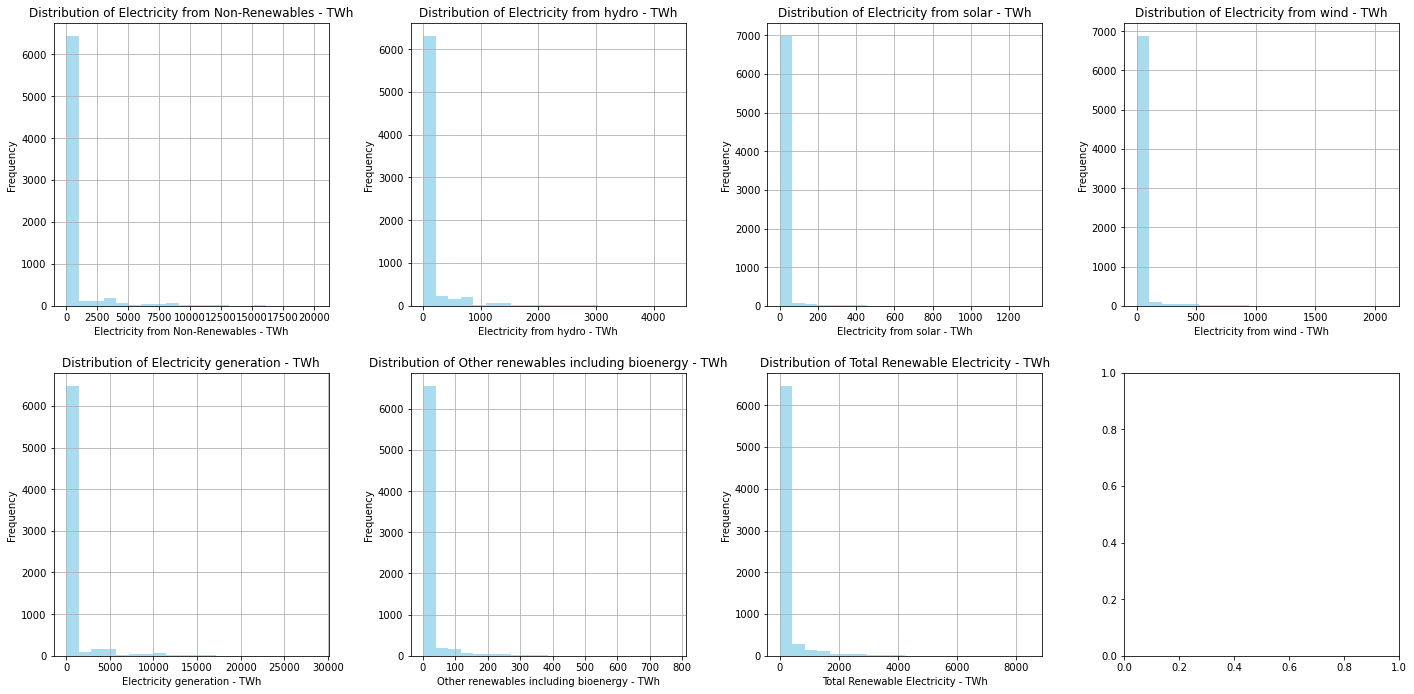

In [22]:
# Univariate Analysis with histograms
print("Univariate Analysis:")
num_cols = merged_df.columns.difference(['Entity', 'Year'])  # Exclude non-numeric columns
num_plots = len(num_cols)
fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2 + num_plots % 2, figsize=(20, 10))

for i, col in enumerate(num_cols):
    row_index = i // (num_plots // 2 + num_plots % 2)
    col_index = i % (num_plots // 2 + num_plots % 2)
    merged_df[col].hist(ax=axes[row_index, col_index], bins=20, color='skyblue', alpha=0.7)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout(pad=2.0)
plt.show()

The right-skewed histograms, which means that most of the data points are concentrated towards the left (lower values) of the distribution, reflect the inherent characteristics and dynamics of energy generation from both renewable and non-renewable sources, including natural limits, seasonal variations, intermittency, technological constraints, and data-related factors. 

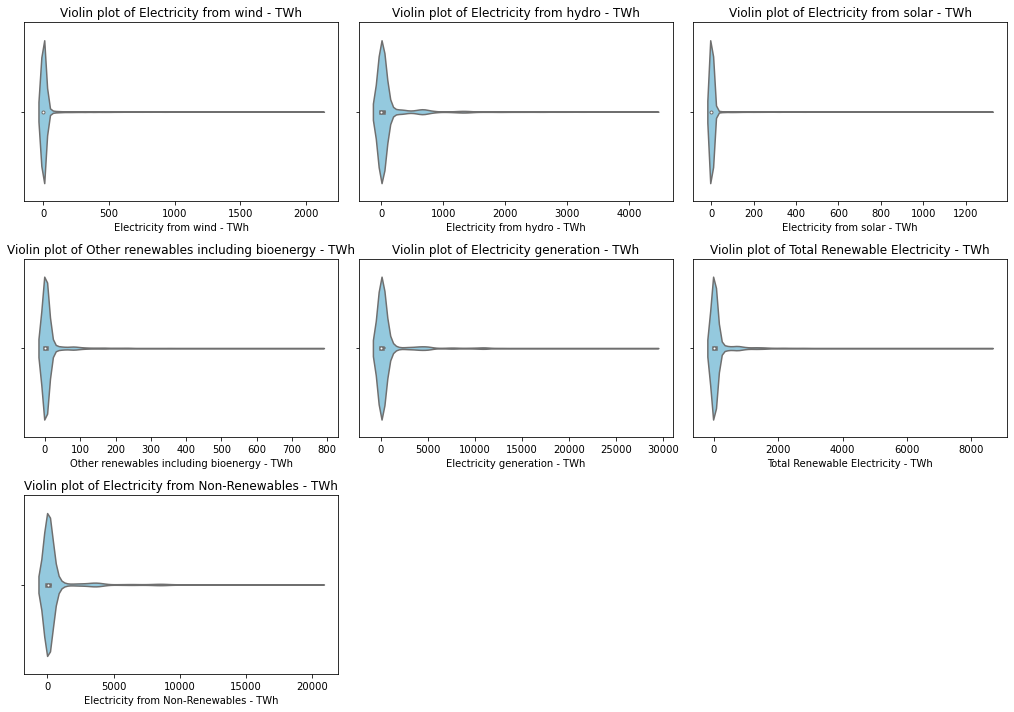

In [23]:
electricity_cols = ['Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh',
                    'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
                    'Electricity from Non-Renewables - TWh']

plt.figure(figsize=(14, 10))  # Adjust the figure size

# Create subplots
for i, col in enumerate(electricity_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=merged_df[col], color='skyblue')  # Use violin plot instead of box plot
    plt.title(f'Violin plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


The violin plots indicate that renewable energy sources, especially wind and solar, play a significant role in electricity generation, as evidenced by their wider distributions. Hydro energy also contributes, albeit to a lesser extent. Other renewables, such as bioenergy, are notable contributors as well. On the contrary, non-renewable energy sources have a smaller share in electricity generation, as suggested by their narrower distributions. Overall, renewable energy sources dominate the dataset in terms of electricity generation.

### (b) Bivariate Data Analysis

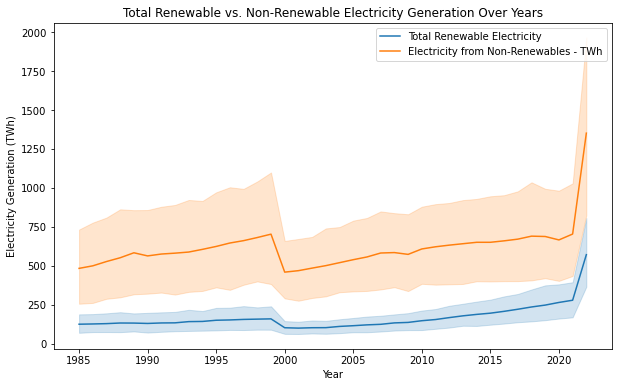

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Total Renewable Electricity - TWh', label='Total Renewable Electricity')
sns.lineplot(data=merged_df, x='Year', y='Electricity from Non-Renewables - TWh', label='Electricity from Non-Renewables - TWh')
plt.title('Total Renewable vs. Non-Renewable Electricity Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.show()

The line plot illustrates the comparison between total renewable electricity generation and electricity generation from non-renewable sources over the years. It demonstrates that renewable energy sources, including wind, hydro, solar, and other renewables, consistently contribute more to electricity generation compared to non-renewable sources such as coal, natural gas, and nuclear energy. In essence, renewable energy sources emerge as the primary contributors to electricity generation in the dataset, with non-renewable sources playing a secondary role. This perspective highlights the dominance of renewable energy in the dataset's electricity generation dynamics over time.

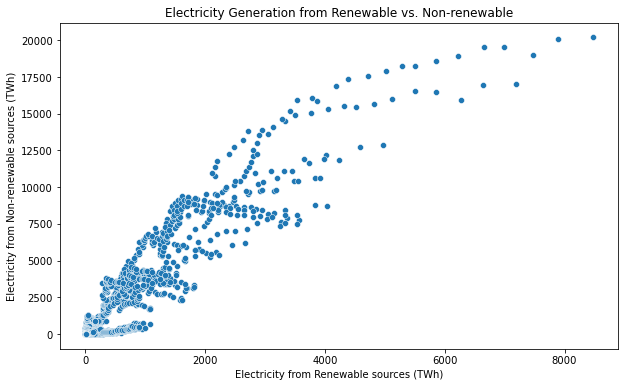

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Total Renewable Electricity - TWh', y='Electricity from Non-Renewables - TWh')
plt.title('Electricity Generation from Renewable vs. Non-renewable')
plt.xlabel('Electricity from Renewable sources (TWh)')
plt.ylabel('Electricity from Non-renewable sources (TWh)')
plt.show()

The scatter plot depicts the relationship between electricity generation from renewable sources and non-renewable sources over the years. It reveals a trend of increasing electricity generation from renewables alongside decreasing generation from non-renewables, indicating a shift towards renewable energy dominance in electricity generation. However, there are instances where renewables are unable to fully meet demand, leading to reliance on non-renewable sources as backup. Overall, the scatter plot underscores the transition towards greater reliance on renewables in electricity generation, albeit with occasional dependence on non-renewables during periods of insufficient renewable generation.

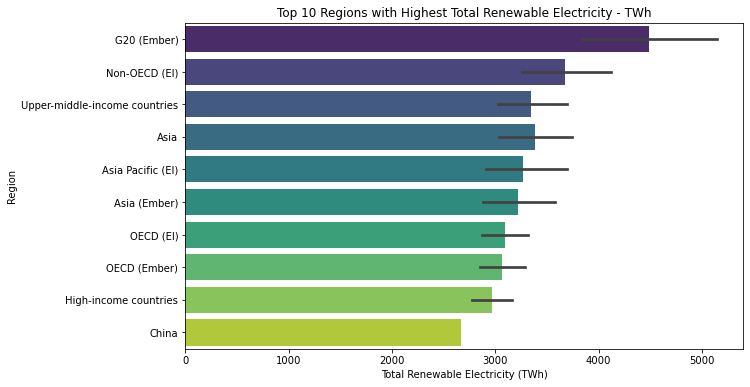

In [26]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_renewable_regions = df_filtered.sort_values(by='Total Renewable Electricity - TWh', ascending=False).head(70)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_renewable_regions, x='Total Renewable Electricity - TWh', y='Entity', palette='viridis')
plt.title('Top 10 Regions with Highest Total Renewable Electricity - TWh')
plt.xlabel('Total Renewable Electricity (TWh)')
plt.ylabel('Region')
plt.show()

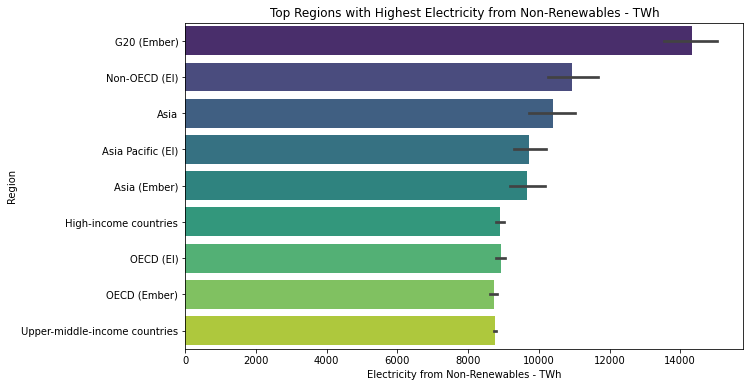

In [27]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_non_renewable_regions = df_filtered.sort_values(by='Electricity from Non-Renewables - TWh', ascending=False).head(100)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_non_renewable_regions, x='Electricity from Non-Renewables - TWh', y='Entity', palette='viridis')
plt.title('Top Regions with Highest Electricity from Non-Renewables - TWh')
plt.xlabel('Electricity from Non-Renewables - TWh')
plt.ylabel('Region')
plt.show()

The bar plot presents the top 70 regions with the highest total renewable electricity generation, showcasing China as the leader, followed by the United States, European Union, India, and Brazil. These leading regions collectively contribute a substantial portion of total renewable electricity generation. Additionally, the plot highlights disparities, revealing many regions with relatively low renewable electricity generation, particularly African countries and some Asian nations. This observation suggests untapped potential for renewable energy expansion in these regions. Overall, the bar plot emphasizes the significance of renewable energy contributions from leading regions while signaling opportunities for growth and development in regions with lower renewable electricity generation.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

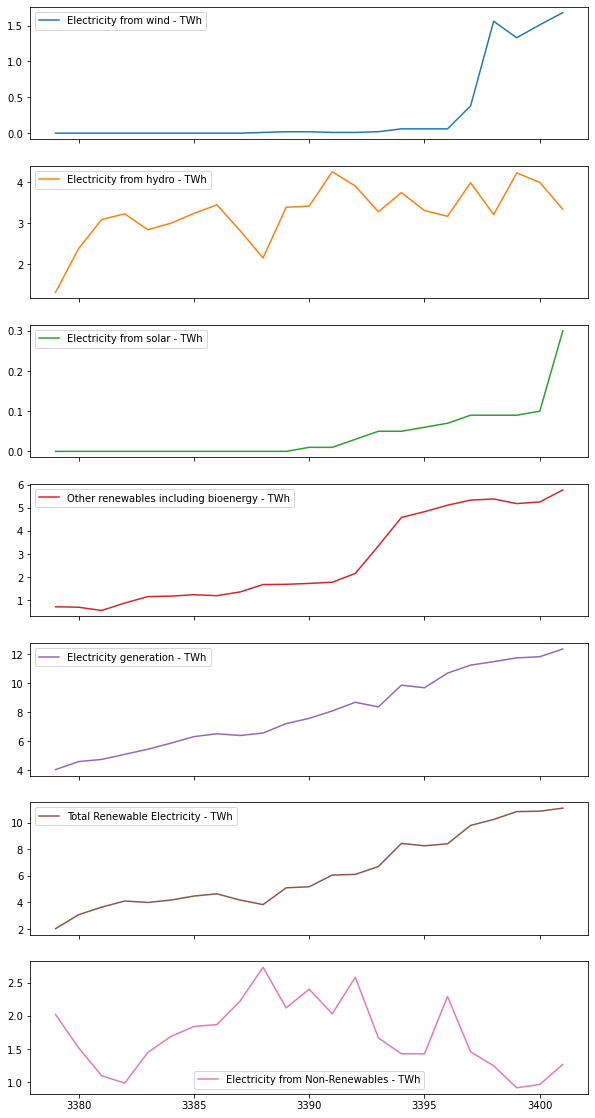

In [28]:
merged_df.loc[merged_df['Entity'] == 'Kenya', ['Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']].plot(figsize=(10,20), subplots= True)

Kenya has shown a positive trend in increasing its renewable energy capacity and generation, particularly in hydro and geothermal sources. While wind energy generation has seen modest growth, there's potential for further expansion. Solar energy, although currently small, is on the rise. Geothermal capacity stands out as the second-largest source of electricity in Kenya. Overall, the country is making strides towards reducing reliance on fossil fuels for electricity generation, contributing to both emission reduction and enhanced energy security.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

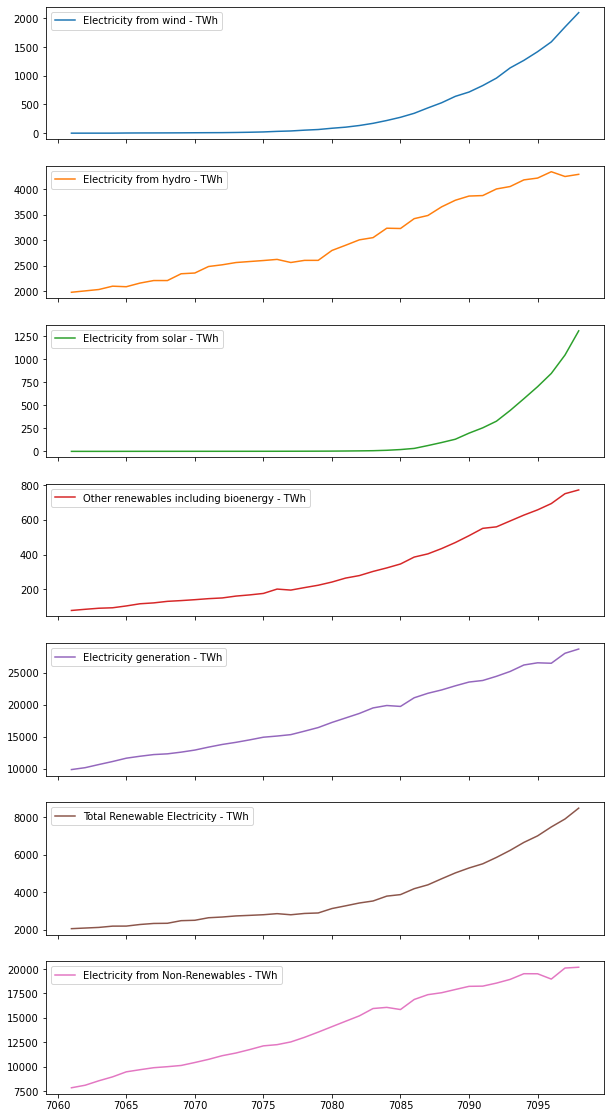

In [29]:
merged_df.loc[merged_df['Entity'] == 'World', ['Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']].plot(figsize=(10,20), subplots= True)

The provided analysis showcases global trends in electricity generation:

1. Wind energy has exhibited rapid growth from 2010 to 2020.
2. Hydroelectric power remains stable and significant globally.
3. Solar energy generation has seen substantial growth in recent years.
4. Other renewables, including bioenergy, have shown steady growth.
5. Total electricity generation is increasing, comprising both renewable and non-renewable sources.
6. Renewable electricity generation, including wind, hydro, solar, and other renewables, has experienced significant growth.
7. Non-renewable energy generation, such as fossil fuels and nuclear power, has slightly decreased, emphasizing the importance of transitioning to cleaner energy sources.

Overall, while significant progress has been made in expanding renewable energy capacity, reducing reliance on fossil fuels remains crucial for mitigating climate change and enhancing energy security. Continued efforts are needed to achieve a fully sustainable and low-carbon electricity system globally.

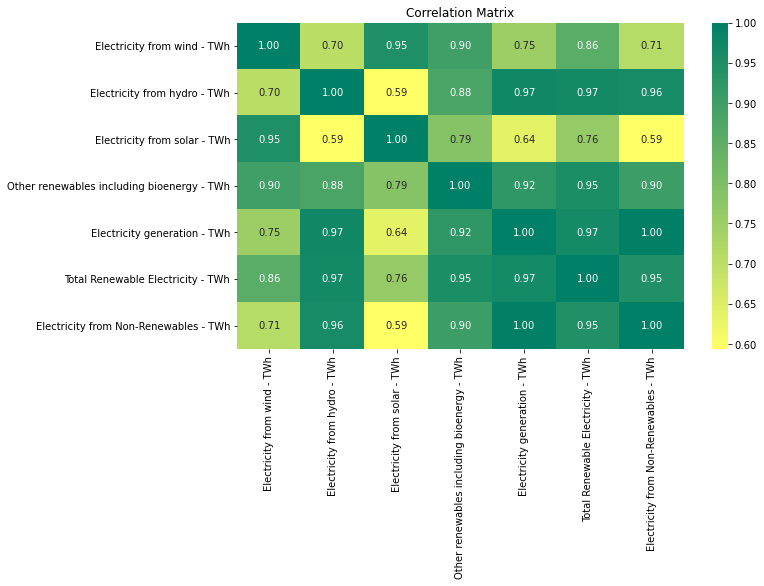

In [30]:
# Correlation Analysis
correlation_matrix = merged_df.drop(columns=['Entity', 'Year']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='summer_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals strong positive correlations among renewable energy sources and total electricity generation. Conversely, there's a strong negative correlation between renewable and non-renewable energy sources, indicating an inverse relationship. Hydroelectric power shows a moderate positive correlation with total electricity generation. However, correlations with CO2 emissions are generally weak, suggesting a complex relationship influenced by various factors. Overall, the matrix provides insights into the interplay between different variables, guiding further analysis and interpretation of the dataset.

In [2]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
merged_df.to_csv('modelling.csv', index=False)

NameError: name 'merged_df' is not defined

## 4. MODELLING 


In [3]:
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


# 1. predicting for WIND

In [8]:
# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from wind - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                     'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from wind - TWh']


# Create pipelines for different regressors
pipeline_wind_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_wind_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_wind_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines = [pipeline_wind_rf, pipeline_wind_gb, pipeline_wind_linear]

# Fit and evaluate each model
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 3.5993791028989324
Mean Absolute Error (MAE): 0.34035521157863363
R-squared (R2) Score: 0.998690837848606

Testing Set Metrics:
Mean Squared Error (MSE): 6512.926198867029
Mean Absolute Error (MAE): 18.926618647510075
R-squared (R2) Score: 0.8582419474146843

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 12.558078142179035
Mean Absolute Error (MAE): 1.102298662231276
R-squared (R2) Score: 0.9954323898294715

Testing Set Metrics:
Mean Squared Error (MSE): 5309.41010137442
Mean Absolute Error (MAE): 16.86040786838945
R-squared (R2) Score: 0.8844372539522142

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 9.465068992266319e-07
Mean Absolute Error (MAE): 0.0004475795831157987
R-squared (R2) Score: 0.9999999996557376

Testing Set Metrics:
Mean Squared Error (MSE): 1.5080041921108444e-06
Mean Absolute Error (MAE): 0.000482866176869108
R-squared (R2) Score:

In [5]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [6]:
train_results

,Actual,Predicted
0,0.0,-8.391017
1,0.0,-8.401383
2,0.0,-7.847600
3,0.0,-7.851046
4,0.0,-5.810998
...,...,...
7155,0.0,-0.144537
7156,0.0,-0.076192
7157,0.0,-0.114111
7158,0.0,-0.087766


In [7]:
test_results

,Actual,Predicted
17,2.55,24.563940
18,3.47,30.972000
19,5.91,44.970539
20,5.79,55.822334
21,8.30,85.709694
...,...,...
7160,0.00,-0.187408
7161,0.00,-0.165241
7162,0.00,-0.140112
7163,0.00,-0.174538


# 2. predicting for HYDRO

In [9]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from wind - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                       'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from hydro - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from wind - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                     'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from hydro - TWh']

# Define preprocessing steps for the pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_hydro_linear = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

pipeline_hydro_rf = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_hydro_gb = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_hydro = [pipeline_hydro_rf, pipeline_hydro_gb, pipeline_hydro_linear]

# Fit and evaluate each model
for pipeline in pipelines_hydro:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 93.7684756517665
Mean Absolute Error (MAE): 2.133104239508274
R-squared (R2) Score: 0.9992784065526377

Testing Set Metrics:
Mean Squared Error (MSE): 5502.980284207019
Mean Absolute Error (MAE): 19.788813171692677
R-squared (R2) Score: 0.9790377685195133

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 660.2685646172706
Mean Absolute Error (MAE): 13.554886961730038
R-squared (R2) Score: 0.9949189163371218

Testing Set Metrics:
Mean Squared Error (MSE): 4217.63735038382
Mean Absolute Error (MAE): 25.372431274729525
R-squared (R2) Score: 0.9839339619854313

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 6.19811168234814e-08
Mean Absolute Error (MAE): 9.739110386647193e-05
R-squared (R2) Score: 0.999999999999523

Testing Set Metrics:
Mean Squared Error (MSE): 1.737551818534895e-07
Mean Absolute Error (MAE): 0.00013311754541649927
R-squared (R2) Score: 0.

In [20]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [21]:
train_results

,Actual,Predicted
0,50.37,50.369701
1,54.26,54.259686
2,53.32,53.319664
3,53.28,53.279635
4,52.88,52.879640
...,...,...
7155,5.34,5.339981
7156,4.95,4.949979
7157,5.38,5.379979
7158,4.94,4.939976


In [22]:
test_results

,Actual,Predicted
17,181.03,181.030202
18,188.64,188.640310
19,162.44,162.440296
20,181.36,181.360497
21,185.61,185.610809
...,...,...
7160,3.97,3.969970
7161,5.05,5.049972
7162,4.17,4.169969
7163,3.81,3.809966


# 3. predicting for SOLAR

In [23]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from wind - TWh', 'Other renewables including bioenergy - TWh', 
                      'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from solar - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from wind - TWh', 'Other renewables including bioenergy - TWh', 
                    'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from solar - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_solar_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_solar_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_solar_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_solar = [pipeline_solar_rf, pipeline_solar_gb, pipeline_solar_linear]

# Fit and evaluate each model
for pipeline in pipelines_solar:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.7937246077149176
Mean Absolute Error (MAE): 0.11945387845013446
R-squared (R2) Score: 0.9965341979958601

Testing Set Metrics:
Mean Squared Error (MSE): 4855.721473722839
Mean Absolute Error (MAE): 15.054576132770526
R-squared (R2) Score: 0.647739211813447

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.8731780351772443
Mean Absolute Error (MAE): 0.2782893621618115
R-squared (R2) Score: 0.996187264254033

Testing Set Metrics:
Mean Squared Error (MSE): 4308.672439429034
Mean Absolute Error (MAE): 14.151323991141313
R-squared (R2) Score: 0.6874251627148449

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 9.873708069455696e-07
Mean Absolute Error (MAE): 0.00043709339427189307
R-squared (R2) Score: 0.9999999956886411

Testing Set Metrics:
Mean Squared Error (MSE): 1.8031107309233392e-05
Mean Absolute Error (MAE): 0.001177266040531908
R-squared (R2) Sco

In [10]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh',  
                      'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from solar - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh',  
                      'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from solar - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_solar_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_solar_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_solar_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_solar = [pipeline_solar_rf, pipeline_solar_gb, pipeline_solar_linear]

# Fit and evaluate each model
for pipeline in pipelines_solar:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 1.332221143679235
Mean Absolute Error (MAE): 0.1546377512415103
R-squared (R2) Score: 0.9941828504939343

Testing Set Metrics:
Mean Squared Error (MSE): 6094.90413390126
Mean Absolute Error (MAE): 18.180680673504394
R-squared (R2) Score: 0.5578420743965251

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 3.540352095336143
Mean Absolute Error (MAE): 0.5190558121242521
R-squared (R2) Score: 0.9845410369439068

Testing Set Metrics:
Mean Squared Error (MSE): 5984.005979269229
Mean Absolute Error (MAE): 18.96278210104493
R-squared (R2) Score: 0.5658872375242946

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 36.08503052539346
Mean Absolute Error (MAE): 2.0338426382374566
R-squared (R2) Score: 0.8424345548837037

Testing Set Metrics:
Mean Squared Error (MSE): 3743.585678661152
Mean Absolute Error (MAE): 15.837579950537132
R-squared (R2) Score: 0.728419669673

In [24]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [25]:
train_results

,Actual,Predicted
0,0.00,0.001164
1,0.00,0.001125
2,0.00,0.001080
3,0.00,0.001022
4,0.00,0.001022
...,...,...
7155,0.00,0.000076
7156,0.00,0.000067
7157,0.00,0.000059
7158,0.01,0.010048


In [26]:
test_results

,Actual,Predicted
17,6.38,6.381224
18,6.98,6.981357
19,13.84,13.840729
20,20.34,20.340430
21,35.46,35.459551
...,...,...
7160,0.01,0.010024
7161,0.02,0.020019
7162,0.03,0.030006
7163,0.03,0.029995


# 4. predicting for BIOENERGY

In [27]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Electricity from wind - TWh', 
                      'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Other renewables including bioenergy - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Electricity from wind - TWh', 
                    'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Other renewables including bioenergy - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_bioenergy_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_bioenergy_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_bioenergy_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_bioenergy = [pipeline_bioenergy_rf, pipeline_bioenergy_gb, pipeline_bioenergy_linear]

# Fit and evaluate each model
for pipeline in pipelines_bioenergy:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 2.2230111061404245
Mean Absolute Error (MAE): 0.30627385121595535
R-squared (R2) Score: 0.9987581677783848

Testing Set Metrics:
Mean Squared Error (MSE): 721.8011292887358
Mean Absolute Error (MAE): 7.872531378935768
R-squared (R2) Score: 0.9086147240479681

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 10.517247609327727
Mean Absolute Error (MAE): 1.4586807310039458
R-squared (R2) Score: 0.9941247900526038

Testing Set Metrics:
Mean Squared Error (MSE): 708.9869390590806
Mean Absolute Error (MAE): 8.781994877228776
R-squared (R2) Score: 0.9102370937876674

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 1.1973522265143287e-06
Mean Absolute Error (MAE): 0.00045883685317552335
R-squared (R2) Score: 0.9999999993311277

Testing Set Metrics:
Mean Squared Error (MSE): 1.613549146162549e-05
Mean Absolute Error (MAE): 0.0012156227468208154
R-squared (R2) Sc

In [28]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [29]:
train_results

,Actual,Predicted
0,22.400000,22.400703
1,22.289999,22.290773
2,22.540000,22.540808
3,22.250000,22.250904
4,24.039999,24.040765
...,...,...
7155,0.340000,0.340058
7156,0.410000,0.410063
7157,0.410000,0.410074
7158,0.420000,0.420085


In [30]:
test_results

,Actual,Predicted
17,47.470000,47.468892
18,53.220000,53.218320
19,53.850000,53.848665
20,55.180000,55.178594
21,60.059998,60.058522
...,...,...
7160,0.320000,0.320119
7161,0.390000,0.390122
7162,0.380000,0.380136
7163,0.350000,0.350150


# 5. predicting for TOTAL ELECTRICITY GENERATION

In [31]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity generation - TWh']

X_test = test_data[['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity generation - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_total_electricity_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_total_electricity_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_total_electricity_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_total_electricity = [pipeline_total_electricity_rf, pipeline_total_electricity_gb, pipeline_total_electricity_linear]

# Fit and evaluate each model
for pipeline in pipelines_total_electricity:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 284.3448400127942
Mean Absolute Error (MAE): 3.688334288427826
R-squared (R2) Score: 0.999946337274498

Testing Set Metrics:
Mean Squared Error (MSE): 69041.85278524314
Mean Absolute Error (MAE): 57.38890992973851
R-squared (R2) Score: 0.9940349674836996

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 462.79849088735364
Mean Absolute Error (MAE): 8.902765594655017
R-squared (R2) Score: 0.9999126587689156

Testing Set Metrics:
Mean Squared Error (MSE): 49038.041507766495
Mean Absolute Error (MAE): 42.13234693386234
R-squared (R2) Score: 0.9957632435931378

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 3.6227012878949396e-09
Mean Absolute Error (MAE): 2.484088573606404e-05
R-squared (R2) Score: 0.9999999999999993

Testing Set Metrics:
Mean Squared Error (MSE): 9.785416804535206e-09
Mean Absolute Error (MAE): 3.597710331867289e-05
R-squared (R2) Score: 

In [32]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [33]:
train_results

,Actual,Predicted
0,368.08,368.080054
1,396.60,396.600055
2,423.11,423.110052
3,447.70,447.700051
4,485.55,485.550044
...,...,...
7155,8.93,8.930002
7156,9.26,9.260002
7157,9.71,9.710002
7158,9.39,9.390002


In [34]:
test_results

,Actual,Predicted
17,1005.46,1005.460015
18,1064.03,1064.030001
19,1117.14,1117.139976
20,1105.12,1105.119976
21,1153.07,1153.069947
...,...,...
7160,7.35,7.350002
7161,9.19,9.190003
7162,8.24,8.240002
7163,7.59,7.590002


# 6. predicting for TOTAL RENEWABLE ELECTRICITY

In [35]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Electricity from wind - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Total Renewable Electricity - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from wind - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Total Renewable Electricity - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_total_renewable_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_total_renewable_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_total_renewable_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_total_renewable = [pipeline_total_renewable_rf, pipeline_total_renewable_gb, pipeline_total_renewable_linear]

# Fit and evaluate each model
for pipeline in pipelines_total_renewable:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 33.97736256235051
Mean Absolute Error (MAE): 1.1136662632179675
R-squared (R2) Score: 0.9998283711915357

Testing Set Metrics:
Mean Squared Error (MSE): 45996.270667741825
Mean Absolute Error (MAE): 50.150205600048714
R-squared (R2) Score: 0.9447649689241112

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 61.84481434133213
Mean Absolute Error (MAE): 3.0937602442074854
R-squared (R2) Score: 0.9996876051878476

Testing Set Metrics:
Mean Squared Error (MSE): 38196.95821344027
Mean Absolute Error (MAE): 43.746209146207256
R-squared (R2) Score: 0.954130842711919

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 1.2450595632054232e-08
Mean Absolute Error (MAE): 4.707527494439657e-05
R-squared (R2) Score: 0.9999999999999372

Testing Set Metrics:
Mean Squared Error (MSE): 3.0429525437863385e-08
Mean Absolute Error (MAE): 6.104285977251505e-05
R-squared (R2) Sco

In [36]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [37]:
train_results

,Actual,Predicted
0,72.770000,72.770090
1,76.549999,76.550091
2,75.860000,75.860088
3,75.530000,75.530088
4,76.919999,76.920073
...,...,...
7155,5.680000,5.680002
7156,5.360000,5.360002
7157,5.790000,5.790002
7158,5.370000,5.370002


In [38]:
test_results

,Actual,Predicted
17,237.430000,237.430009
18,252.310000,252.309980
19,236.040000,236.039946
20,262.670000,262.669946
21,289.429998,289.429899
...,...,...
7160,4.300000,4.300003
7161,5.460000,5.460004
7162,4.580000,4.580003
7163,4.190000,4.190004


# 7. predicting for TOTAL ELECTRICITY from NON-RENEWABLES

In [39]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Total Renewable Electricity - TWh', 'Electricity from wind - TWh', 'Year']]
y_train = train_data['Electricity from Non-Renewables - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Total Renewable Electricity - TWh', 'Electricity from wind - TWh', 'Year']]
y_test = test_data['Electricity from Non-Renewables - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_non_renewable_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_non_renewable_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_non_renewable_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_non_renewable = [pipeline_non_renewable_rf, pipeline_non_renewable_gb, pipeline_non_renewable_linear]

# Fit and evaluate each model
for pipeline in pipelines_non_renewable:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 317.50030853175883
Mean Absolute Error (MAE): 3.755080034917034
R-squared (R2) Score: 0.9999092694566323

Testing Set Metrics:
Mean Squared Error (MSE): 74670.54977219338
Mean Absolute Error (MAE): 64.7666114108299
R-squared (R2) Score: 0.9880713627836412

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 696.5736936771267
Mean Absolute Error (MAE): 13.15467527474206
R-squared (R2) Score: 0.9998009434698969

Testing Set Metrics:
Mean Squared Error (MSE): 46474.31055018257
Mean Absolute Error (MAE): 63.49372317095063
R-squared (R2) Score: 0.9925757183772609

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.3147322733859397e-09
Mean Absolute Error (MAE): 2.08142737881004e-05
R-squared (R2) Score: 0.9999999999999993

Testing Set Metrics:
Mean Squared Error (MSE): 4.643205460352915e-09
Mean Absolute Error (MAE): 2.3171390079186914e-05
R-squared (R2) Score: 0

In [40]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [41]:
train_results

,Actual,Predicted
0,295.310000,295.309939
1,320.050001,320.049938
2,347.250000,347.249936
3,372.170000,372.169932
4,408.630001,408.629937
...,...,...
7155,3.250000,3.249997
7156,3.900000,3.899997
7157,3.920000,3.919997
7158,4.020000,4.019997


In [42]:
test_results

,Actual,Predicted
17,768.030000,768.030022
18,811.720000,811.720043
19,881.100000,881.100037
20,842.450000,842.450053
21,863.640002,863.640081
...,...,...
7160,3.050000,3.049996
7161,3.730000,3.729996
7162,3.660000,3.659996
7163,3.400000,3.399995


## EXPORT THE MODEL

In [43]:
import pickle

# Export pipeline_bioenergy_linear
with open('pipeline_bioenergy_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_bioenergy_linear, f)

# Export pipeline_hydro_linear
with open('pipeline_hydro_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_hydro_linear, f)

# Export pipeline_wind_linear
with open('pipeline_wind_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_wind_linear, f)

# Export pipeline_non_renewable_linear
with open('pipeline_non_renewable_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_non_renewable_linear, f)

# Export pipeline_solar_linear
with open('pipeline_solar_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_solar_linear, f)

# Export pipeline_total_electricity_linear
with open('pipeline_total_electricity_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_total_electricity_linear, f)

# Export pipeline_total_renewable_linear
with open('pipeline_total_renewable_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_total_renewable_linear, f)


## LOAD THE MODEL

In [44]:
# Load trained models
pipeline_bioenergy_linear1 = pickle.load(open('pipeline_bioenergy_linear.pkl', 'rb'))
pipeline_hydro_linear1 = pickle.load(open('pipeline_hydro_linear.pkl', 'rb'))
pipeline_wind_linear1 = pickle.load(open('pipeline_wind_linear.pkl', 'rb'))
pipeline_non_renewable_linear1 = pickle.load(open('pipeline_non_renewable_linear.pkl', 'rb'))
pipeline_solar_linear1 = pickle.load(open('pipeline_solar_linear.pkl', 'rb'))
pipeline_total_electricity_linear1 = pickle.load(open('pipeline_total_electricity_linear.pkl', 'rb'))
pipeline_total_renewable_linear1 = pickle.load(open('pipeline_total_renewable_linear.pkl', 'rb'))

## MAKE A PREDICTION WITH LOADED MODEL

In [45]:
request_json = {}

expected_features = ('Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
        'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year')

example_values = ['Kenya', 12.36, 3.34, 0.3, 5.77, 11.09, 1.27, 2022]

for i, feature in enumerate(expected_features):
    request_json[feature] = example_values[i]
request_json

{'Entity': 'Kenya',
 'Electricity generation - TWh': 12.36,
 'Electricity from hydro - TWh': 3.34,
 'Electricity from solar - TWh': 0.3,
 'Other renewables including bioenergy - TWh': 5.77,
 'Total Renewable Electricity - TWh': 11.09,
 'Electricity from Non-Renewables - TWh': 1.27,
 'Year': 2022}

In [56]:
import pandas as pd

# Assuming request_json contains the input data
test_value = [request_json[feature] for feature in expected_features]

# Convert the input data to a DataFrame with a single row
test_df = pd.DataFrame([test_value], columns=expected_features)

# Predict using the pipeline
predicted_value = int(pipeline_wind_linear1.predict(test_df)[0])

# Rest of your code
response_json = {'prediction': predicted_value}


In [65]:
# Define input data for prediction
input_data = {'Entity': 'Kenya',
 'Electricity generation - TWh': 24.72,
 'Electricity from hydro - TWh': 6.68,
 'Electricity from solar - TWh': 0.6,
 'Other renewables including bioenergy - TWh': 11.54,
 'Total Renewable Electricity - TWh': 1000,
 'Electricity from Non-Renewables - TWh': 2,
 'Year': 2022}

input_df = pd.DataFrame([input_data])

# Predict using the deployed model
predicted_value = pipeline_wind_linear.predict(input_df)

# Display the prediction
print('Predicted Electricity from Wind (TWh):', predicted_value)


Predicted Electricity from Wind (TWh): [655.39915556]


In [82]:
modelling.drop(columns=['Entity'], inplace= True)

In [83]:
modelling.corr()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
Year,1.000000,0.187297,0.027078,0.176930,0.127573,0.043695,0.083361,0.031970
Electricity from wind - TWh,0.187297,1.000000,0.704669,0.949331,0.899804,0.749813,0.855733,0.711092
Electricity from hydro - TWh,0.027078,0.704669,1.000000,0.594017,0.882362,0.973237,0.969531,0.962893
Electricity from solar - TWh,0.176930,0.949331,0.594017,1.000000,0.787179,0.637262,0.763310,0.594167
Other renewables including bioenergy - TWh,0.127573,0.899804,0.882362,0.787179,1.000000,0.924123,0.954425,0.904739
Electricity generation - TWh,0.043695,0.749813,0.973237,0.637262,0.924123,1.000000,0.967615,0.997450
Total Renewable Electricity - TWh,0.083361,0.855733,0.969531,0.763310,0.954425,0.967615,1.000000,0.947132
Electricity from Non-Renewables - TWh,0.031970,0.711092,0.962893,0.594167,0.904739,0.997450,0.947132,1.000000


# TIME SERIES MODELLING

In [106]:
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


# Load 101

In [195]:
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


In [185]:
modelling.apply(pd.isnull).sum()/modelling.shape[0]

Entity                                        0.0
Year                                          0.0
Electricity from wind - TWh                   0.0
Electricity from hydro - TWh                  0.0
Electricity from solar - TWh                  0.0
Other renewables including bioenergy - TWh    0.0
Electricity generation - TWh                  0.0
Total Renewable Electricity - TWh             0.0
Electricity from Non-Renewables - TWh         0.0
dtype: float64

In [186]:
# modelling.drop(columns=['Entity'], inplace=True)

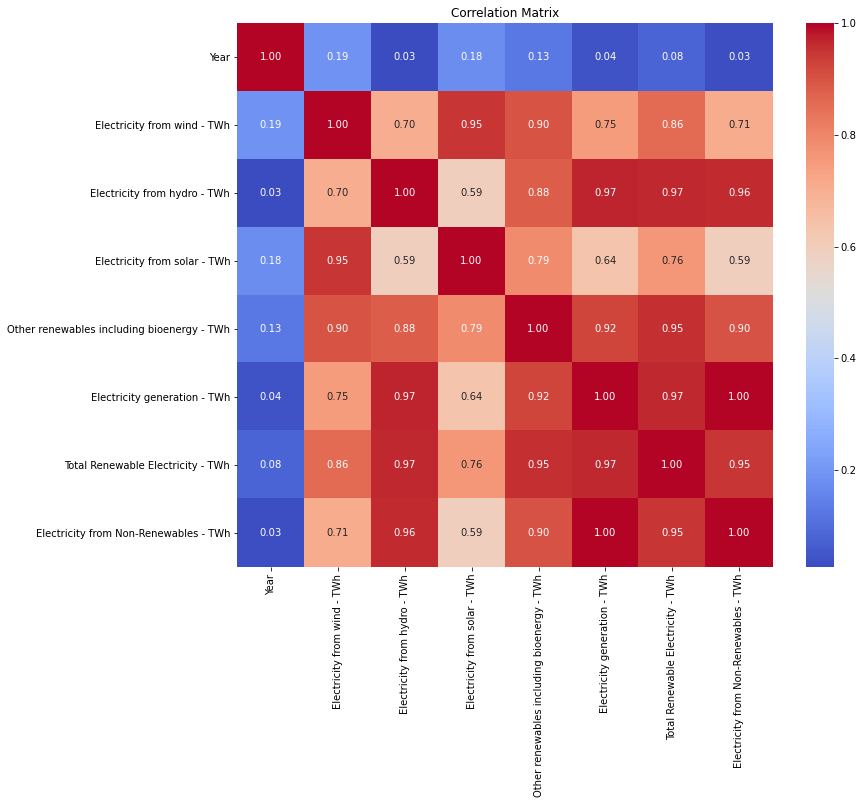

In [187]:
# Let's calculate the correlation matrix
corr_matrix = modelling.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix highlights strong positive correlations between total renewable electricity and electricity generation, as well as a negative correlation between renewable and non-renewable energy sources. Hydroelectric power also shows a moderate positive correlation with total electricity generation. However, correlations with CO2 emissions are generally weak, indicating a complex relationship. Overall, the matrix offers insights into the dataset's variables, emphasizing the growing importance of renewable energy while suggesting the need for further analysis on emissions.

In [188]:
# Calculate the correlation matrix
corr = modelling.corr()

# Set a threshold for identifying highly correlated features
threshold = 0.7

# Identify highly correlated features
multicollinear_features = []

def find_multicollinear_features(feature):
    multicollinear = corr[feature][(corr[feature] >= threshold) & (corr.index != feature)]
    if not multicollinear.empty:
        multicollinear_features.extend([(feature, idx, round(corr[feature][idx], 2)) for idx, _ in multicollinear.items()])

# Loop through features to find highly correlated pairs
for feature in corr:
    find_multicollinear_features(feature)

# Create a DataFrame of highly correlated features
MC_df = pd.DataFrame(multicollinear_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
print('Highly Correlated Features')
display(MC_df)

Highly Correlated Features


,Feature 1,Feature 2,Correlation
0,Electricity from wind - TWh,Electricity from hydro - TWh,0.70
1,Electricity from wind - TWh,Electricity from solar - TWh,0.95
2,Electricity from wind - TWh,Other renewables including bioenergy - TWh,0.90
3,Electricity from wind - TWh,Electricity generation - TWh,0.75
4,Electricity from wind - TWh,Total Renewable Electricity - TWh,0.86
5,Electricity from wind - TWh,Electricity from Non-Renewables - TWh,0.71
6,Electricity from hydro - TWh,Electricity from wind - TWh,0.70
7,Electricity from hydro - TWh,Other renewables including bioenergy - TWh,0.88
8,Electricity from hydro - TWh,Electricity generation - TWh,0.97
9,Electricity from hydro - TWh,Total Renewable Electricity - TWh,0.97


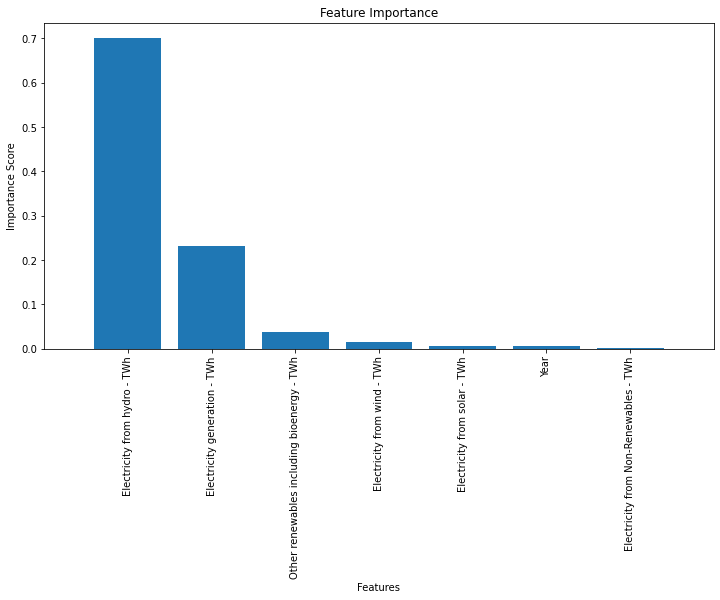

In [189]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' contains your feature variables and 'y' contains the target variable
X = modelling.drop(columns=['Total Renewable Electricity - TWh'])
y = modelling['Total Renewable Electricity - TWh']

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

The feature importance plot reveals the significance of various predictors in forecasting 'Total Renewable Electricity - TWh' using a Random Forest Regressor model. Here's a concise summary:

- 'Electricity from hydro - TWh' emerges as the most critical predictor, highlighting hydroelectric power's substantial contribution to renewable energy.
- 'Electricity from wind - TWh' and 'Electricity from solar - TWh' follow closely, signifying the importance of wind and solar energy in the renewable energy landscape.
- 'Electricity from other renewables including bioenergy - TWh' holds lesser importance, suggesting a relatively smaller contribution from other renewable sources like bioenergy.
- Conversely, 'Electricity from Non-Renewables - TWh' acts as a negative predictor, indicating an inverse relationship with renewable energy.
- 'CO2 emissions - Mt' exhibits weak importance, implying a complex relationship between emissions and renewable energy.
Overall, the plot underscores the pivotal roles of hydro, wind, and solar power in renewable energy generation while emphasizing the need to reduce reliance on non-renewable sources. Further analysis is required to understand the intricate dynamics between renewable energy and emissions.

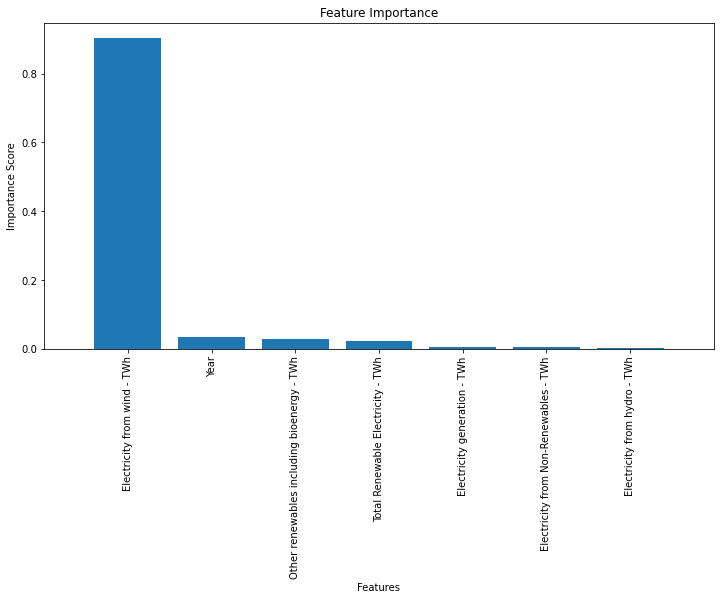

In [190]:
# Assuming 'X' contains your feature variables and 'y' contains the target variable
X = modelling.drop(columns=['Electricity from solar - TWh'])
y = modelling['Electricity from solar - TWh']

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [191]:
modelling.columns

Index(['Year', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

In [196]:
# Filter data for the years 2000 to 2022
modelling_filtered = modelling[(modelling['Year'] >= 2000) & (modelling['Year'] <= 2022)]
modelling_filtered

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


In [197]:
modelling_filtered['Year'] = pd.to_datetime(modelling_filtered['Year'], format='%Y').dt.year

In [198]:
# Set 'Year' column as index
modelling_filtered.set_index('Year', inplace=True)

In [199]:
modelling_filtered

,Entity,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
Year,,,,,,,,
2000,ASEAN (Ember),0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
2001,ASEAN (Ember),0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2002,ASEAN (Ember),0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
2003,ASEAN (Ember),0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
2004,ASEAN (Ember),0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...
2017,Zimbabwe,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
2018,Zimbabwe,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
2019,Zimbabwe,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000


In [200]:
modelling_filtered.to_csv('modelling_filtered.csv', index=False)

In [152]:
core_modelling = modelling_filtered[['Electricity from hydro - TWh', 'Electricity generation - TWh']].copy()

In [153]:
core_modelling

,Electricity from hydro - TWh,Electricity generation - TWh
Year,,
2000,50.37,368.08
2001,54.26,396.60
2002,53.32,423.11
2003,53.28,447.70
2004,52.88,485.55
...,...,...
2017,3.97,7.35
2018,5.05,9.19
2019,4.17,8.24


In [154]:
core_modelling.columns = ['hydro', 'total_generation']

In [155]:
core_modelling

,hydro,total_generation
Year,,
2000,50.37,368.08
2001,54.26,396.60
2002,53.32,423.11
2003,53.28,447.70
2004,52.88,485.55
...,...,...
2017,3.97,7.35
2018,5.05,9.19
2019,4.17,8.24


In [156]:
core_modelling[['hydro', 'total_generation', 'bioenergy', 'solar']].plot()

KeyError: "['bioenergy', 'solar'] not in index"

In [157]:
core_modelling.index.value_counts().sort_index()

Year
2000    249
2001    249
2002    249
2003    250
2004    250
2005    250
2006    250
2007    250
2008    250
2009    250
2010    250
2011    250
2012    248
2013    248
2014    248
2015    248
2016    248
2017    248
2018    248
2019    248
2020    248
2021    248
2022    128
Name: count, dtype: int64

In [158]:
core_modelling['target'] = core_modelling.shift(-1)['hydro']

In [159]:
core_modelling

,hydro,total_generation,target
Year,,,
2000,50.37,368.08,54.26
2001,54.26,396.60,53.32
2002,53.32,423.11,53.28
2003,53.28,447.70,52.88
2004,52.88,485.55,53.76
...,...,...,...
2017,3.97,7.35,5.05
2018,5.05,9.19,4.17
2019,4.17,8.24,3.81


In [160]:
core_modelling = core_modelling.iloc[:-1,:].copy()

In [161]:
core_modelling

,hydro,total_generation,target
Year,,,
2000,50.37,368.08,54.26
2001,54.26,396.60,53.32
2002,53.32,423.11,53.28
2003,53.28,447.70,52.88
2004,52.88,485.55,53.76
...,...,...,...
2016,2.95,6.82,3.97
2017,3.97,7.35,5.05
2018,5.05,9.19,4.17


In [162]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [163]:
predictors = ['hydro','total_generation']

In [164]:
train = core_modelling.loc[core_modelling.index <= 2016]
test = core_modelling.loc[core_modelling.index >= 2017]

In [165]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [166]:
predictions = reg.predict(test[predictors])

In [167]:
from sklearn.metrics import mean_absolute_error

In [168]:
mean_absolute_error(test['target'], predictions)

37.1649772017305

In [169]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']

In [170]:
combined

,actual,predictions
Year,,
2017,188.64,185.592139
2018,162.44,193.398290
2019,181.36,166.439226
2020,185.61,185.898719
2021,218.34,190.253255
...,...,...
2021,3.23,16.287558
2017,5.05,3.848466
2018,4.17,4.958431


In [171]:
reg.coef_

array([ 1.02830555e+00, -3.28729218e-04])

In [172]:
core_modelling['yearly_max'] = core_modelling['hydro'].rolling(5).mean()

In [173]:
core_modelling

,hydro,total_generation,target,yearly_max
Year,,,,
2000,50.37,368.08,54.26,NaN
2001,54.26,396.60,53.32,NaN
2002,53.32,423.11,53.28,NaN
2003,53.28,447.70,52.88,NaN
2004,52.88,485.55,53.76,52.822
...,...,...,...,...
2016,2.95,6.82,3.97,4.712
2017,3.97,7.35,5.05,4.438
2018,5.05,9.19,4.17,4.458


In [133]:
core_modelling['max_min'] = core_modelling['yearly_max'] / core_modelling['hydro']

In [134]:
core_modelling

,hydro,total_generation,target,yearly_max,max_min
Year,,,,,
2000,50.37,368.08,54.26,NaN,NaN
2001,54.26,396.60,53.32,NaN,NaN
2002,53.32,423.11,53.28,NaN,NaN
2003,53.28,447.70,52.88,NaN,NaN
2004,52.88,485.55,53.76,52.822,0.998903
...,...,...,...,...,...
2016,2.95,6.82,3.97,4.712,1.597288
2017,3.97,7.35,5.05,4.438,1.117884
2018,5.05,9.19,4.17,4.458,0.882772


In [174]:
predictors = ['hydro','total_generation', 'yearly_max']

In [175]:
def create_predictions(predictors, core_weather, reg):
    train = core_modelling.loc[core_modelling.index <= 2016]
    test = core_modelling.loc[core_modelling.index >= 2017]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [176]:
core_modelling = core_modelling.iloc[5:, :].copy()

In [177]:
core_modelling

,hydro,total_generation,target,yearly_max
Year,,,,
2005,53.76,511.05,60.38,53.500
2006,60.38,535.42,63.13,54.724
2007,63.13,564.30,69.80,56.686
2008,69.80,590.38,73.52,59.990
2009,73.52,611.38,78.85,64.118
...,...,...,...,...
2016,2.95,6.82,3.97,4.712
2017,3.97,7.35,5.05,4.438
2018,5.05,9.19,4.17,4.458


In [178]:
core_modelling.isna().sum()

hydro               0
total_generation    0
target              0
yearly_max          0
dtype: int64

In [179]:
core_modelling

,hydro,total_generation,target,yearly_max
Year,,,,
2005,53.76,511.05,60.38,53.500
2006,60.38,535.42,63.13,54.724
2007,63.13,564.30,69.80,56.686
2008,69.80,590.38,73.52,59.990
2009,73.52,611.38,78.85,64.118
...,...,...,...,...
2016,2.95,6.82,3.97,4.712
2017,3.97,7.35,5.05,4.438
2018,5.05,9.19,4.17,4.458


In [180]:
error, combined = create_predictions(predictors, core_modelling, reg)

In [181]:
error

53710.35927852284

In [182]:
combined

,actual,predictions
Year,,
2017,188.64,185.464118
2018,162.44,193.292703
2019,181.36,166.435674
2020,185.61,185.888668
2021,218.34,190.259893
...,...,...
2021,3.23,16.239493
2017,5.05,3.800287
2018,4.17,4.906781


In [17]:
# Filter data for the years 2000 to 2022
modelling_filtered = modelling[(modelling['Year'] >= 2000) & (modelling['Year'] <= 2022)]

In [18]:
modelling_filtered

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


In [19]:
modelling_filtered['Year'] = pd.to_datetime(modelling_filtered['Year'], format='%Y').dt.year

In [20]:
modelling_filtered.set_index('Year', inplace=True)

In [201]:
modelling_filtered

,Entity,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
Year,,,,,,,,
2000,ASEAN (Ember),0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
2001,ASEAN (Ember),0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2002,ASEAN (Ember),0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
2003,ASEAN (Ember),0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
2004,ASEAN (Ember),0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...
2017,Zimbabwe,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
2018,Zimbabwe,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
2019,Zimbabwe,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000


In [22]:
modelling_filtered.columns

Index(['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

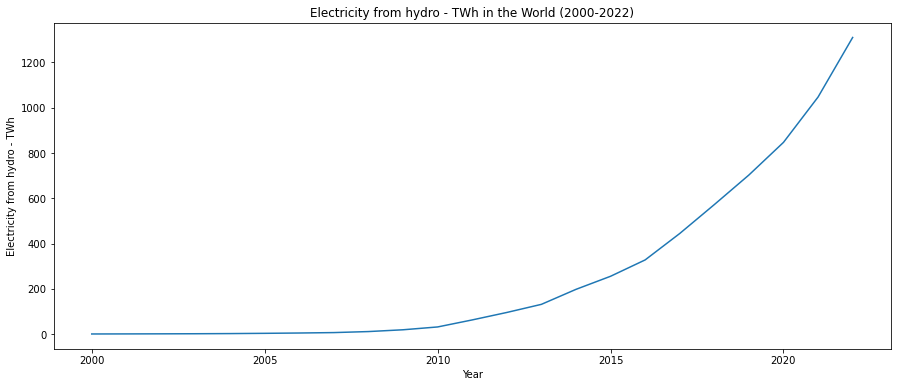

In [23]:
# Plot 'Electricity from hydro - TWh' for the world
modelling_filtered.loc[modelling_filtered['Entity'] == 'World', 'Electricity generation - TWh'].plot(figsize=(15,6))
plt.title('Electricity generation - TWh in the World (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Electricity generation - TWh')
plt.show()

# TRAIN/TEST SPLIT

In [25]:
train = modelling_filtered.loc[modelling_filtered.index < 2017]
test = modelling_filtered.loc[modelling_filtered.index >= 2017]

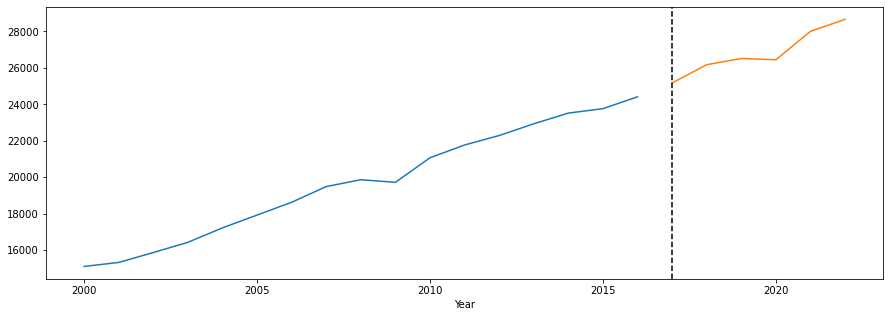

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
train.loc[train['Entity'] == 'World', 'Electricity generation - TWh'].plot(ax=ax, label= 'Training set')
test.loc[test['Entity'] == 'World', 'Electricity generation - TWh'].plot(ax=ax, label= 'Test set')
ax.axvline(2017, color = 'black', ls='--')
plt.show()

# Create our Model

In [42]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    return df

df = create_features(modelling_filtered)

In [41]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [43]:
df.columns

Index(['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

In [45]:
FEATURES = ['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']
TARGET = ['Electricity generation - TWh']

In [46]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [49]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

ImportError: cannot import name 'Int64Index' from 'pandas' (C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\pandas\__init__.py)

# new idea

In [204]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [211]:
# Filter the dataset to include only data for Kenya
solar_series_kenya = modelling_filtered[modelling_filtered['Entity'] == 'Kenya']['Electricity from solar - TWh']

In [212]:
# Use auto_arima to find the best ARIMA parameters (non-seasonal as the data is annual)
stepwise_fit = auto_arima(solar_series_kenya, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-70.151, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-73.799, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-72.051, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-72.112, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-73.522, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.680 seconds


In [213]:
# Fit ARIMA model
model = ARIMA(solar_series_kenya, order=stepwise_fit.order)
model_fit = model.fit()

C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [224]:
# Forecast for the next 4 years (2022-2025)
forecast = model_fit.forecast(steps=10)

C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [225]:
# The forecast for 2025
solar_forecast_2025 = forecast.iloc[-1]

In [226]:
print(f"Predicted solar electricity generation for Kenya in 2025: {solar_forecast_2025} TWh")

Predicted solar electricity generation for Kenya in 2025: 0.3 TWh


In [227]:
modelling.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

# ARIMA

In [10]:
import itertools

In [14]:
!pip install --upgrade statsmodels pandas

Requirement already up-to-date: statsmodels in c:\users\rono\anaconda3\envs\learn-env\lib\site-packages (0.14.1)
Requirement already up-to-date: pandas in c:\users\rono\anaconda3\envs\learn-env\lib\site-packages (2.0.3)


In [15]:
import statsmodels.api as sm

ImportError: cannot import name 'PD_LT_2' from 'statsmodels.compat.pandas' (C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\statsmodels\compat\pandas.py)

In [ ]:
p = d = q = range(0,2)

pdq = list(itertools.product(pdq))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
from flask import Flask, render_template, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Load trained models
pipeline_bioenergy_linear = pickle.load(open('pipeline_bioenergy_linear.pkl', 'rb'))
pipeline_hydro_linear = pickle.load(open('pipeline_hydro_linear.pkl', 'rb'))
pipeline_wind_linear = pickle.load(open('pipeline_wind_linear.pkl', 'rb'))
pipeline_non_renewable_linear = pickle.load(open('pipeline_non_renewable_linear.pkl', 'rb'))
pipeline_solar_linear = pickle.load(open('pipeline_solar_linear.pkl', 'rb'))
pipeline_total_electricity_linear = pickle.load(open('pipeline_total_electricity_linear.pkl', 'rb'))
pipeline_total_renewable_linear = pickle.load(open('pipeline_total_renewable_linear.pkl', 'rb'))

# Function to preprocess input data
def preprocess_input(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data, index=[0])

    # Add default values for missing columns
    for column in ['Entity', 'Year']:
        if column not in df.columns:
            df[column] = 'Unknown'

    return df

# Define routes
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data
    data = request.json

    # Preprocess input data
    input_df = preprocess_input(data)

    # Choose the model based on user's choice
    model_choice = data['model']

    if model_choice == 'bioenergy':
        pipeline = pipeline_bioenergy_linear
    elif model_choice == 'hydro':
        pipeline = pipeline_hydro_linear
    elif model_choice == 'wind':
        pipeline = pipeline_wind_linear
    elif model_choice == 'non_renewable':
        pipeline = pipeline_non_renewable_linear
    elif model_choice == 'solar':
        pipeline = pipeline_solar_linear
    elif model_choice == 'total_electricity':
        pipeline = pipeline_total_electricity_linear
    elif model_choice == 'total_renewable':
        pipeline = pipeline_total_renewable_linear
    else:
        return jsonify({'error': 'Invalid model choice'})

    # Make prediction using the selected pipeline
    prediction = pipeline.predict(input_df)

    # Return prediction as JSON response
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
